# Comparison of Average Global Temperature

Todd Schultz, Rahul Birmiwal, Abhishek Anand


## Table of Contents
1. Introduction
2. Data Retrieval
3. Comparison and Contrasts
4. Augmenting of Carbon Dioxide Data







## I. Introduction
#### Problem Statement

Climate change, fundamentally, is defined by historical changes in statistical properties of a climate system(s). It is well known that canonical/generalized scientific work pertinent to climate change often utilizes sample mean/sample variance (spread) of historical global temperatures. Akin to the hotly debated global warming topics of today -- "is the Earth abnormally warming? cooling? in a normal hot/cold cycle? -- studies in climate change cover a broader spectrum of scientific inquiry. Scientists in this field will perhaps wish to _predict_ future temperatures, uncover _anomalies_ in climate time-series data, etc. Furthermore the study of global climate(s) is of paramount importance to a host of industries -- aviation, agriculture, and biology amongst them. 

Perhaps a more esoteric offshoot in the study of climate change is ascertaining the efficacy of the data sources _themselves_. Without a doubt (and without voicing opinions), the potential negative ramifications of (a hypothetically) abnormally warming earth, i.e. on biological ecosystems, on food production, on water levels, and the inevitable sociopolitical outcry against such manifestations of 'anti-climate/environmentalism', threaten industries, countries, etc. built upon antagonistic actors -- the oil industry, fossil-fuel exporting nations, etc. Although a pessimistic viewpoint, it is realistic, therefore, to think that not all climate data is treated equally. 

Perhaps data from a factbook database, such as the WorldBank, is "centrist"; perhaps that from NOAA (National Oceanic and Atmospheric Administration), or BerkeleyEarth given their sources of funding as bastions of progressive change, are biased towards data evincing global warming; or perhaps data from China, Russia, the Middle East, whose economies wholly depend on the prolonged sustenance of oil, tend towards conservative climate estimates? 

In essence, many governments and organizations provide estimates of the average global temperatures, but who watches over them? Citizen scientists and analytists routinely attempt to reproduce and verify the results and have the technical training and education to understand and even improve climate estimates. However, many don't have computer training or time to collect and corrolate data provided by the various sources with uniquely and different interfaces. Given proper tools to ease the data access task, a layperson scientist can keep tabs on the watchers.

This report uses the Python programming language, its associated libraries, exhaustive documentation, and various data sources as exemplary of the broader class of climate literature , to allow this layperson reader familiar with basic programming and climatee study to: 
1. Reproduce our compare/contrast climate data analyses from various data sources 
2. Extend the analysis of climate estimates to one's own areas of interest, or one's own (different) data sources
3. Question the efficacy of climate data 

#### Data Sources

Insofar, this project has utilized three different data sources of global average temperatures, from:  
1. NOAA (https://www.ncdc.noaa.gov/cag/global/time-series)
2. BerkeleyEarth (http://berkeleyearth.org)
3. The WorldBank (http://data.worldbank.org)

#### Functional Format

Data retrieval and access is governed through Pythonic 'handler' functions whose signatures are of the form: 
```python 
data = grab_agency(kwargs**)
```
where 'agency' can be 'noaa', 'berkeley', 'worldbank' and kwargs are optional arguments to the respective function (see Documentation for details). I.e.

```python
data = grab_worldbank(1960,2012)
```
will return a Pandas dataframe of _(Date, Temperature)_ tuples (see Documentations) obtained using WorldBank data for years 1960-2012. 

With this in mind, these functions are used to pull data from these various formats, each function outputting data in constant _(Date, Temperature/Temperature Anomaly)_ format. We then perform compare and contrast analysis using said data. 
 

#### Aside: Absolute Temperature vs. Temperature Anomalies

Please note that the second columns of the aforementions dataframes are in units of 'absolute degrees Celsius' or 'temperature anomaly.' Why is this? 

In most cases, using 'anomalic' temperature is preferred over absolute estimates, where the temperature anomaly is defined to be the positive or negative departure from a long-term global temperature average. That is, a positive anomaly means the earth was warmer than normal and vice versa. 

Using temperature anomalies for spatial/temperature data is preferred in the scientific community because, frankly, absolute surface temperature is hard to compile, and posits many 'risks' to normalized measurement -- some regions might have few temperature stations like the Sahara Desert or Arctic; some regions are more mountainous and deviate more from sea level and vice versa, creating bias in their outputted measurements, etc, etc. 

In this regard, it is difficult to directly compare data in the two different formats, precisely because the definition of refernence/long-term average in the anomaly case is undefined, i.e. we as outsiders do not know how the difference agencies compute the statistic. Moreover the statistic may itself be a moving average. However, if we simply care about the overall 'shape' of the temperature curves, then it _may_ be possible to visualize the two formats on the same graph.


In [1]:
# Set paths
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'DegreesOfClimateChange')))

In [2]:
# Imports
from grab_berkeley import grab_berkeley
from grab_noaa import grab_noaa
from grab_worldbank import grab_worldbank
from grab_co2_scripps import grab_scripps_co2_data
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib notebook

# Data Retrieval
As outlined above, we pull the data from our source using the ` grab_ ` functions

### From NOAA 

In [4]:
df_noaa = grab_noaa() #get dataframe of data sorted chronologically 

In [5]:
df_noaa.head(5) #view first 5 elements 


,Date,Tanomaly_C
0,1880-1-01,0.00
1,1880-2-01,-0.12
2,1880-3-01,-0.13
3,1880-4-01,-0.04
4,1880-5-01,-0.06


In [6]:
df_noaa.tail(5) #view last 5 elements 

,Date,Tanomaly_C
1655,2017-12-01,0.81
1656,2018-1-01,0.70
1657,2018-2-01,0.68
1658,2018-3-01,0.84
1659,2018-4-01,0.83


### From World Bank
* Note: Depending on starting/ending year (see `grab_worldbank.py` for details), function can take ~2-3 minutes to pull data

In [7]:
df_wb = grab_worldbank()

.......computing worldwide averages across all years...hang on!!!


In [8]:
df_wb.head(5)

,Date,Tabsolute_C
0,1901-01-01,19.002034
1,1902-01-01,18.882094
2,1903-01-01,18.925365
3,1904-01-01,18.835930
4,1905-01-01,18.877793


### From BerkeleyEarth

In [9]:
df_berkeley = grab_berkeley()

In [10]:
df_berkeley.head(5)

,Date,Tanomaly_C
0,1750-1-01,0.382
1,1750-2-01,0.539
2,1750-3-01,0.574
3,1750-4-01,0.382
4,1750-5-01,NaN


## Comparison Figures
The figures below show the comparison of the global average temperature estimates for the difference data sources provided in this report. The comparison is shown with multiple figures as a single figure is unable to clearly show all of the features of the comparison between the data sources. The first figure show an individual plot for each of the global average temperature estimates. The range of dates plotted for each estimate are the same to easily show the historical extent of each data source. Here, the estimates from Berkeley extent the fartherest back by over 100 years to the year 1750. Next, the range the temperature estimates are held constant for the two data sources that provide an anomaly or deviation from the mean as the estimate as compared to the World Bank data source that provides an absolute temperature value. This shows that while the Berkeley data source has the most variability, especially in the first 50 years from 1750 to 1800. Overall, all three estimates are showing a general raising tend in the global average temperature over the last century. 

In [11]:
# Prepare data for plotting
# NOAA Data
tnoaa = pd.to_datetime(df_noaa['Date'])
datesnoaa = matplotlib.dates.date2num(tnoaa)

# Berkeley Data
tberkeley = pd.to_datetime(df_berkeley['Date'])
datesberkeley = matplotlib.dates.date2num(tberkeley)

# World Bank Data
twb = pd.to_datetime(df_wb['Date'])
dateswb = matplotlib.dates.date2num(twb)

# Find plotting limits
datemin = min([datesnoaa.min(), datesberkeley.min(), dateswb.min()])
datemax = max([datesnoaa.max(), datesberkeley.max(), dateswb.max()])
datelims = [datemin, datemax]

ymin = math.floor(min([df_noaa["Tanomaly_C"].min(), df_berkeley["Tanomaly_C"].min()]))
ymax = math.ceil(max([df_noaa["Tanomaly_C"].max(), df_berkeley["Tanomaly_C"].max()]))
yanomalylims = [ymin, ymax]

ymin = math.floor(min([df_wb["Tabsolute_C"].min()]))
ymax = math.ceil(max([df_wb["Tabsolute_C"].max()]))
yabsolutelims = [ymin, ymax]

<IPython.core.display.Javascript object>


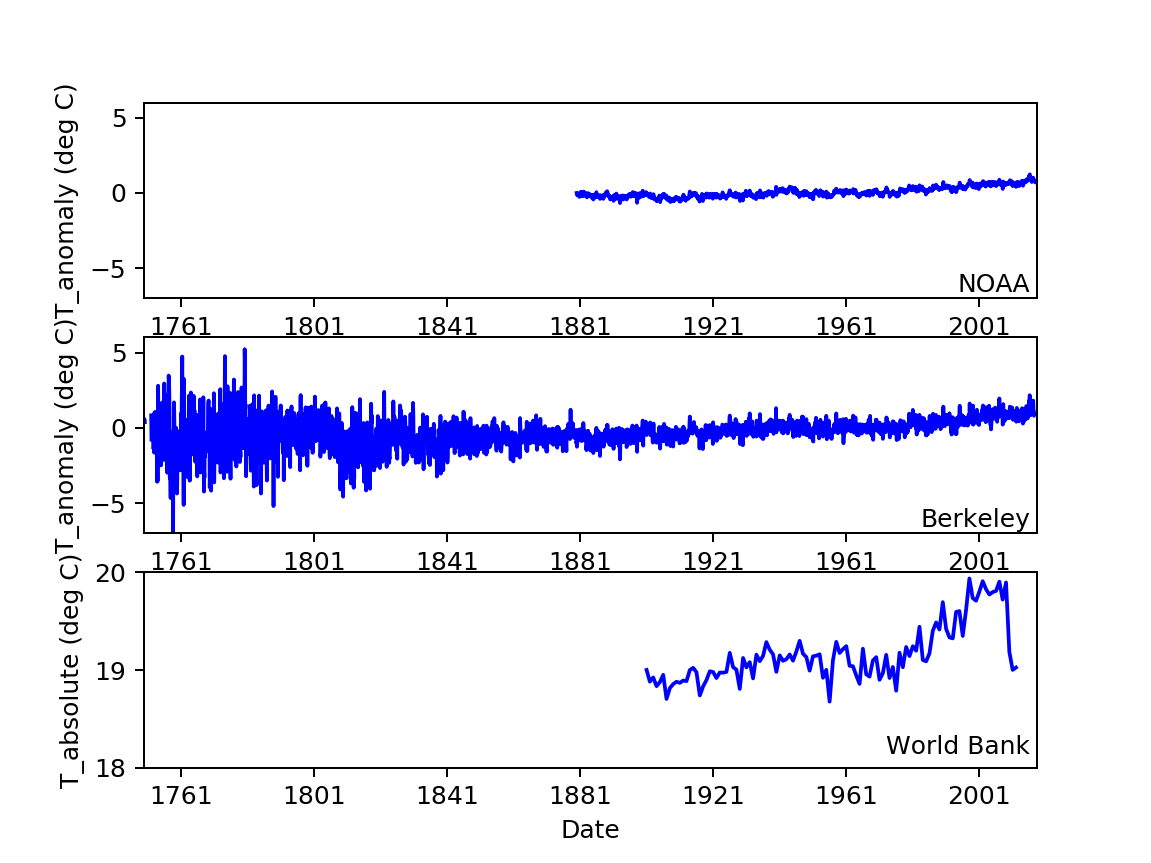

In [23]:
# Create comparison plot
f = plt.figure(1)

ax1 = plt.subplot(3,1,1)
plt.plot_date(datesnoaa, df_noaa["Tanomaly_C"], color="blue", linestyle='solid', marker='None')
#plt.xlabel("Date")
plt.ylabel("T_anomaly (deg C)")
plt.xlim(datelims)
plt.ylim(yanomalylims)
plt.text(0.999*datelims[1], 0.99*yanomalylims[0],'NOAA', verticalalignment='bottom', horizontalalignment='right')

ax2 = plt.subplot(3,1,2)
plt.plot_date(datesberkeley, df_berkeley["Tanomaly_C"], color="blue", linestyle='solid', marker='None')
#plt.xlabel("Date")
plt.ylabel("T_anomaly (deg C)")
plt.xlim(datelims)
plt.ylim(yanomalylims)
plt.text(0.999*datelims[1], 0.99*yanomalylims[0],'Berkeley', verticalalignment='bottom', horizontalalignment='right')

ax3 = plt.subplot(3,1,3)
plt.plot_date(dateswb, df_wb["Tabsolute_C"], color="blue", linestyle='solid', marker='None')
plt.xlabel("Date")
plt.ylabel("T_absolute (deg C)")
plt.xlim(datelims)
plt.ylim(yabsolutelims)
plt.text(0.999*datelims[1], 1.005*yabsolutelims[0],'World Bank', verticalalignment='bottom', horizontalalignment='right');


<IPython.core.display.Javascript object>


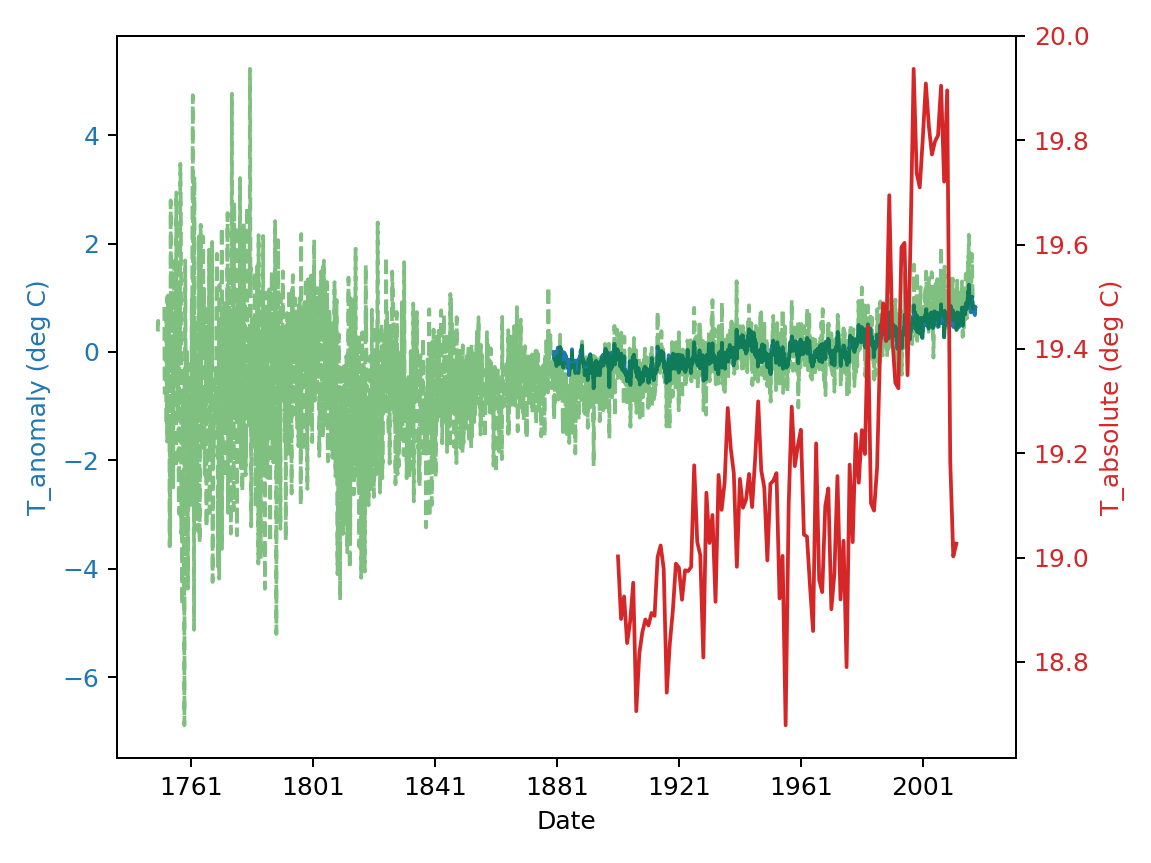

In [22]:
# Create comparison graph
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('T_anomaly (deg C)', color=color1)
ax1.plot_date(datesnoaa, df_noaa["Tanomaly_C"], color=color1, linestyle='solid', marker='None')
ax1.plot_date(datesberkeley, df_berkeley["Tanomaly_C"], color='green', alpha = 0.5, linestyle='dashed', marker='None')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # second axes that shares the same x-axis

color2 = 'tab:red'
ax2.set_ylabel('T_absolute (deg C)', color=color2)
ax2.plot_date(dateswb, df_wb["Tabsolute_C"], color=color2, linestyle='solid', marker='None')
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

We now attempt to combine the two data formats, anomaly and absolute, onto the same graph using the mean global average temperature from 1901-2012 as the reference. This can be achieved by simply taking the 'anomalic' value and adding it to the reference for each year. We do this for the NOAA and BerkeleyEarth datasets now: 

Note: to make the plot more meaningful, we will need to compute yearly averages for the NOAA, Berkeley data as they are originally on per-month basis. We first show the latter below, then proceed onto the plotting

In [14]:
yearly_noaa = df_noaa.groupby(df_noaa['Date'].map(lambda x: pd.to_datetime(x).year)).mean()
yearly_noaa = yearly_noaa.reset_index()
yearly_noaa['Date'] = yearly_noaa['Date'].astype(str) + '-01-01' #reset Date to proper format
yearly_noaa.head()

,Date,Tanomaly_C
0,1880-01-01,-0.109167
1,1881-01-01,-0.055833
2,1882-01-01,-0.061667
3,1883-01-01,-0.140000
4,1884-01-01,-0.201667


In [15]:
yearly_ber = df_berkeley.groupby(df_berkeley['Date'].map(lambda x: pd.to_datetime(x).year)).mean()
yearly_ber = yearly_ber.reset_index()
yearly_ber['Date'] = yearly_ber['Date'].astype(str) + '-01-01' #reset Date to proper format
yearly_ber.head()

,Date,Tanomaly_C
0,1750-01-01,0.469250
1,1751-01-01,-1.716000
2,1752-01-01,-0.468333
3,1753-01-01,-0.409583
4,1754-01-01,-0.254250


--BASELINE TEMP IS  19.164953319341656
--NOAA CONVERTED:  [19.05578665267499, 19.109119986008324, 19.10328665267499, 19.024953319341655, 18.963286652674988, 18.95078665267499, 18.967453319341654, 18.919953319341655]
--Berkeley CONVERTED:  [19.634203319341655, 17.448953319341655, 18.696619986008322, 18.755369986008322, 18.910703319341657, 18.647119986008324, 19.118786652674988, 19.177369986008323]


<IPython.core.display.Javascript object>


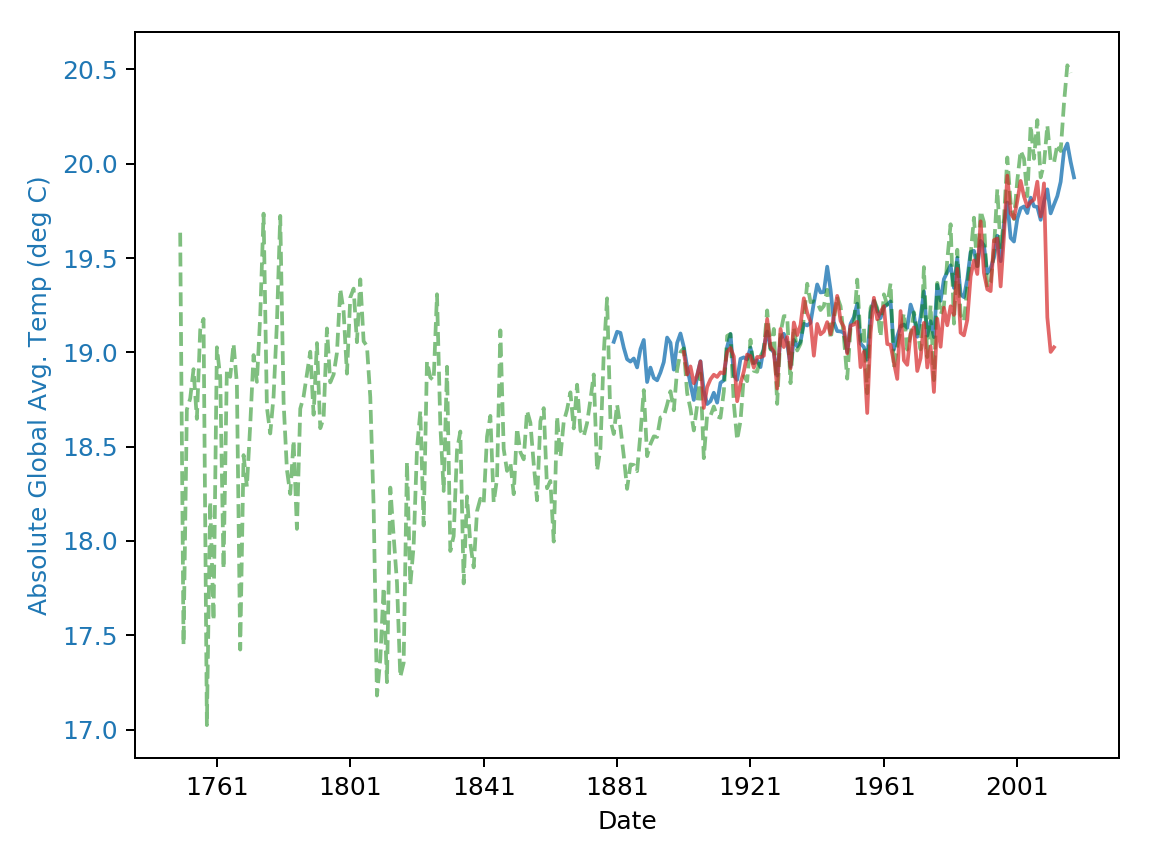

In [21]:
BASELINE_TEMP = np.mean( df_wb['Tabsolute_C'])
print("--BASELINE TEMP IS ", BASELINE_TEMP)

noaa_2_absolute = list(map(lambda x: x + BASELINE_TEMP, yearly_noaa['Tanomaly_C']))
print("--NOAA CONVERTED: ",  noaa_2_absolute[0:8])

berkeley_2_absolute = list(map(lambda x: x + BASELINE_TEMP, yearly_ber['Tanomaly_C']))
print("--Berkeley CONVERTED: ",  berkeley_2_absolute[0:8])

# Get new yearly dates 
dates_yearly_noaa = matplotlib.dates.date2num(pd.to_datetime(yearly_noaa['Date']))
dates_yearly_ber = matplotlib.dates.date2num(pd.to_datetime(yearly_ber['Date']))

# Now redo the plot: 
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
color2 = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Absolute Global Avg. Temp (deg C)', color=color1)
ax1.plot_date(dates_yearly_noaa, noaa_2_absolute, color=color1, linestyle='solid', alpha = 0.8, marker='None')
ax1.plot_date(dates_yearly_ber, berkeley_2_absolute, color='green', alpha = 0.5, linestyle='dashed', marker='None')
ax1.plot_date(dateswb, df_wb["Tabsolute_C"], color=color2, linestyle='solid', alpha = 0.7, marker='None')
ax1.tick_params(axis='y', labelcolor=color1)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### Analysis of Comparison Plots 

Some ideas **blah blah blah**
* If we zoom in on the shared region in the 3rd plot (1901-2012) we can see that the gradient of BerkeleyEarth's data (i.e the rate of increase in the temperature graph year-over-year) exceeds that of NOAA, which exceeds that of the Worldbank. 
**HMMMMMMMMM ^^^^^^^^^^^^ IT SMELLS LIKE A PROGRESSIVE BIAS** 
* Along that train of thought, ALTHOUGH BerkeleyEarth claims to be wholly independent in its opinions re: global warming, going to BerkeleyEarth social media i.e. their Twitter feed, https://twitter.com/BerkeleyEarth/with_replies?lang=en reeks of retweets and posts biased towards the progressive, and highly-environmentalist stance!!! 
* Thus it wouldn't be all that surprising that their data perhaps, maybe....in the way it was collected or sampled, etc. etc. produced a temperature gradient faster than the other "centrist" data sources of NOAA and the worldbank

## 4. Augmentation of Carbon Dioxide Data

It is well known that CO2 and other greenhouse gas emissions, with the advent of increased worldwide industrialization, have impacted climate statistics in recent decades. Here we seek to see any particular visual correlations between CO2 data, and the aforementioned global average temperature datasets. 

To do so, we retrieve carbon dioxide (CO2) measurements in
parts-per-million (ppm) from various measurement sites sanctioned
by Scripps Institute of Oceanography at the University of California, San Diego

The Scripps CO2 program was initiated in 1956 by Charles David Keeling,
an American scientist whose research measuring CO2 levels at the
Moana Loa observatory, Hawaii, is considered the first real 'alert'
to the world of the consequences of greenhouse gases and high CO2 levels, and
its affects on (detrimental) climate change. 

This function pulls data from various sampling stations of the Scripps Institute, namely 

- ALERT, NWT, CANADA
- LA JOLLA, CA, USA
- CHRISTMAS ISLAND, AUSTRALIA
- AMERICAN SAMOA
- SOUTH POLE, ANTARCTICA

We then overlay the CO2 data on top of the previously descriped visualizations regarding temperatures. 

Note: We have removed missing data in the computation of yearly averages 

In [17]:
#pull data using the scripps data function handler 

co2_dataframe = grab_scripps_co2_data()

In [18]:
co2_dataframe.head(10)

,Date,CO2
0,1957-01-01,313.625000
1,1958-01-01,314.706667
2,1959-01-01,315.635000
3,1960-01-01,316.616667
4,1961-01-01,317.387500
5,1962-01-01,317.364444
6,1963-01-01,318.220000
7,1965-01-01,319.287500
8,1966-01-01,320.736364
9,1967-01-01,321.416000


In [19]:
# get absolute data starting from start of the available CO2 data shown above
df_worldbank = grab_worldbank(1957)

.......computing worldwide averages across all years...hang on!!!


<IPython.core.display.Javascript object>


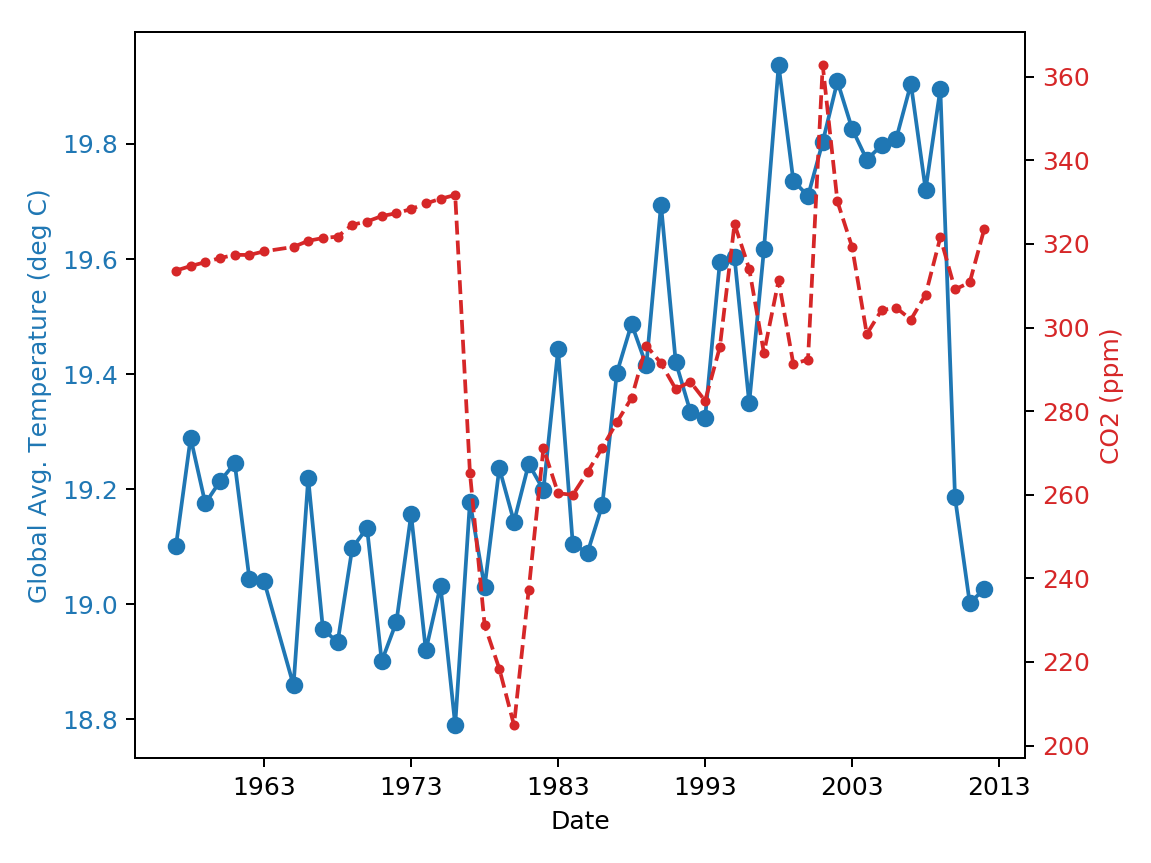

In [20]:
# Get dates to right formatting 
# we need to compute the intersection of the two date lists:


def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

common_dates = intersection(list(pd.to_datetime(co2_dataframe['Date'])), 
                                list(pd.to_datetime(df_worldbank['Date']) )
                               )
# Extract rows in the two dataframes whos date is in common_dates
df_worldbank = df_worldbank[pd.to_datetime(df_worldbank['Date']).isin(common_dates)]
co2_dataframe = co2_dataframe[pd.to_datetime(co2_dataframe['Date']).isin(common_dates)]

# convert to matplotlib required formatting
dates  = matplotlib.dates.date2num(common_dates)

import matplotlib.pyplot as plt
# Create comparison graph
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Global Avg. Temperature (deg C)', color=color1)
ax1.plot_date(dates, df_worldbank["Tabsolute_C"], color=color1, linestyle='solid', marker='o')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # second axes that shares the same x-axis

color2 = 'tab:red'
ax2.set_ylabel('CO2 (ppm)', color=color2)
ax2.plot_date(dates, co2_dataframe["CO2"], color=color2, linestyle='dashed', marker='.')
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



## Conclusions

The purpose of this work is not for the authors to offer final conclusions or a list of future actions. The purpose is to offer a platform for any concerned person to begin their own investigation and to development their own conclusions. To that end, the authors of this work offer their sincerest wishes for your success. 

## References

- Zhang, H.-M., B. Huang, J. Lawrimore, M. Menne, Thomas M. Smith, NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 4.0 NOAA Global Surface Temperature Data. NOAA National Centers for Environmental Information. doi:10.7289/V5FN144H.

- https://www.stat.washington.edu/peter/statclim/Case%202.html

_Required Citations For Scripps Data_: 
- **II**. Macfarling Meure, C. et al., 2006: Law Dome CO2, CH4 and N2O ice core records extended to 2000 years BP. Geophysical Research Letters, 33.
- **III**. C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and oceans from 1978 to 2000. I. Global aspects, SIO Reference Series, No. 01-06, Scripps Institution of Oceanography, San Diego, 88 pages, 2001"



